# Machine Learning

Project 11


# Contents <a id='back'></a>

* [Introduction](#intro)
* [Stage 1: Data Overview](#data_review)
    * [Conclusions](#data_review_conclusions)
* [Stage 2: Splitting the data](#data_splitting)
    * [2.4 Conclusions](#conclusions)
* [Stage 3: Investigate the quality of different models
](#models_quality)
    * [Decision Tree Classifier](#tree)
    * [Random Forest](#forest)
    * [Logic Regression](#regression)
    * [Conclusion](#conclusion)
* [Stage 4: Checking the quality of the model using the test set](#test_set)
* [Stage 5: Sanity check](#sanity_check)
* [Stage 6: Findings](#findings)


## Introduction <a id='#intro'></a>
In this analysis, we are going to train different machine learning models to investigate which one perfoms the best. 

Stages:

1. Investigate the data.

2. Split the source data into a training set, a validation set, and a test set.

3. Investigate the quality of different models by changing hyperparameters.

4. Check the quality of the model using the test set.

5. Perform the sanity check of teh best model.



[Back to Contents](#back)

## Stage 1: Data Overview <a id="data_review"></a>
Obtaining the general information about the table.

Importing the relevant libraries.

In [1]:

#Importing libraries to work with the dataset
import pandas as pd
#Adding simple visualization library
import matplotlib.pyplot as plt
#Adding simple visualization library
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")
#Adding simple visualization library
import plotly.graph_objects as go
#Adding simple visualization library
import plotly.express as px

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyClassifier



Loading the data

In [2]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv('/datasets/users_behavior.csv')

Viewing the dataframe

In [3]:
#Return number of rows and columns
df.shape

(3214, 5)

In [4]:
#Return info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
df.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


Data description

Every observation in the dataset contains monthly behavior information about one user. The information given is as follows: 

- `'сalls'` — number of calls,
- `'minutes'` — total call duration in minutes,
- `'messages'` — number of text messages,
- `'mb_used'` — Internet traffic used in MB,
- `'is_ultra'` — plan for the current month (Ultra - 1, Smart - 0).

Let's investigate the data.

In [6]:
df.groupby(['is_ultra']).mean().T

is_ultra,0,1
calls,58.463437,73.392893
minutes,405.942952,511.224569
messages,33.384029,49.363452
mb_used,16208.466949,19468.823228


Conclusion

The greater amount of calls, minutes of call duration, number of messages and internet traffic is attributed to users who have Ultra plan. Therefore users with ultra plan use more their phones. 

In [7]:
#Checking the descriptive statistics for the data set
for group in df['is_ultra'].unique():
    if group==1:
        result='Ultra'
    else:
        result='Smart'
    print("Basic statistics for",result,"group")
    print("===============================================")
    display(df[df.is_ultra==group].describe())

Basic statistics for Smart group


,calls,minutes,messages,mb_used,is_ultra
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.0
mean,58.463437,405.942952,33.384029,16208.466949,0.0
std,25.939858,184.512604,28.227876,5870.498853,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0
25%,40.000000,274.230000,10.000000,12643.050000,0.0
50%,60.000000,410.560000,28.000000,16506.930000,0.0
75%,76.000000,529.510000,51.000000,20043.060000,0.0
max,198.000000,1390.220000,143.000000,38552.620000,0.0


Basic statistics for Ultra group


,calls,minutes,messages,mb_used,is_ultra
count,985.000000,985.000000,985.000000,985.000000,985.0
mean,73.392893,511.224569,49.363452,19468.823228,1.0
std,43.916853,308.031100,47.804457,10087.178654,0.0
min,0.000000,0.000000,0.000000,0.000000,1.0
25%,41.000000,276.030000,6.000000,11770.280000,1.0
50%,74.000000,502.550000,38.000000,19308.010000,1.0
75%,104.000000,730.050000,79.000000,26837.720000,1.0
max,244.000000,1632.060000,224.000000,49745.730000,1.0


Conclusion

Based on the descriptive statistics, it is evident that there are more users with the Ultra plan (2,229) compared to the Smart plan (985). On average, Ultra plan users exhibit more active behavior than Smart plan users.

Finding correlated features

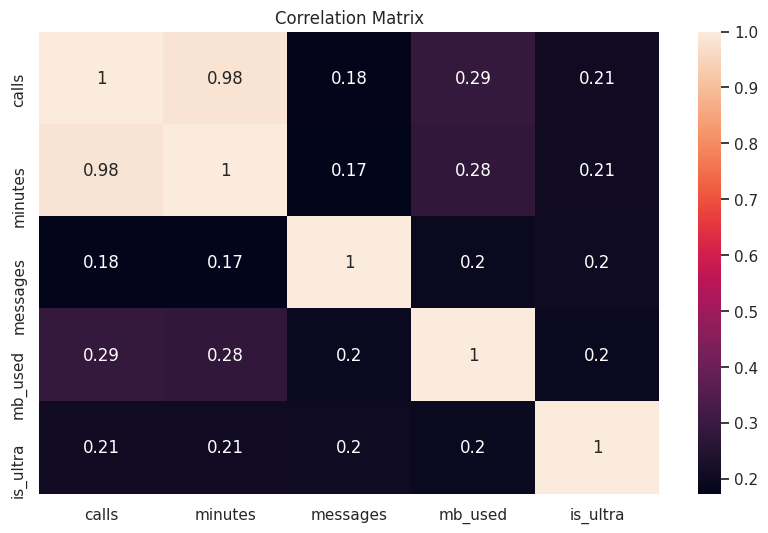

In [8]:
# build and render a correlation matrix
cm = df.corr()  

# plot an annotated heatmap for the correlation matrix

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot = True)

plt.title('Correlation Matrix')

plt.show()

__Conclusion__

Two features from the dataset, 'Minutes' and 'Calls', have a correlation coefficient greater than 0.9. This high correlation can lead to overfitting of the model, where the model captures noise in the training data and performs poorly on new, unseen data.

The 'Minutes' and 'Calls' columns provide essentially the same information. Including both in the model does not add value but rather increases its complexity. Reducing such redundancy can simplify the model without losing important information, making it more efficient and interpretable.

We decided to drop the 'Calls' feature because it is less representative than the 'Minutes' column. The number of calls does not indicate how much data was used, as it doesn't account for the duration of each call. In contrast, the 'Minutes' column provides a clearer understanding of call length and data usage. Therefore, retaining the 'Minutes' feature helps in better capturing the relevant information for the model.

In [9]:
#Dropping the redundant column from the dataset
clean_df = df.drop(['calls'], axis=1)
clean_df.head()

,minutes,messages,mb_used,is_ultra
0,311.90,83.0,19915.42,0
1,516.75,56.0,22696.96,0
2,467.66,86.0,21060.45,0
3,745.53,81.0,8437.39,1
4,418.74,1.0,14502.75,0


[Back to Contents](#back)

## Stage 2: Splitting the data into a training set, a validation set, and a test set.<a id="data_splitting"></a>

To evaluate the model's performance and avoid overfitting we are going to split our data into three data sets, using the 3:1:1 ratio: 

* 60% - Training set: Used to train the model.
* 20% - Validation set: Used to tune the model's hyperparameters.
* 20% - Test set: Used to evaluate the final model's performance.


We'll perform this split in two steps:

First, split the data into training and a combined validation + test set.
Then, split the combined validation + test set into validation and test sets.

In [10]:
from sklearn.model_selection import train_test_split
# Splitting the data into training set (60%) and combined validation + test set (40%)
train, valid = train_test_split(clean_df, test_size=0.4, random_state=42)

# Splitting the combined validation + test set into validation set (20%) and test set (20%)
valid_set, test_set = train_test_split(valid, test_size=0.5, random_state=42)

In [11]:
clean_df.shape

(3214, 4)

In [12]:
train.shape

(1928, 4)

In [13]:
valid.shape

(1286, 4)

In [14]:
display(valid_set.shape)
display(test_set.shape)

(643, 4)

(643, 4)

In [15]:
len(train)/len(clean_df)

0.5998755444928439

__Splitting data into  Feature/Target and Test/Validate/Train__

In [16]:
#Splitting the data into feature/target train. 
features_train = train.drop('is_ultra', axis=1)
target_train = train['is_ultra']
print(features_train.shape)
print(target_train.shape)

(1928, 3)
(1928,)


In [17]:
#Splitting the data into feature/target validate and test. 
features_valid = valid_set.drop('is_ultra', axis=1)
target_valid = valid_set['is_ultra']

features_test = test_set.drop('is_ultra', axis=1)
target_test = test_set['is_ultra']

print(features_valid.shape)
print(target_valid.shape)

print(features_test.shape)
print(target_test.shape)

(643, 3)
(643,)
(643, 3)
(643,)


[Back to Contents](#back)

## Stage 3: Investigate the quality of different models <a id="models_quality"></a>

We are going to investigate the quality of different models by changing their hyperparameters and briefly describe the findings of the study.


### Decision Tree Classifier <a id="tree"></a>

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtc_model=DecisionTreeClassifier(random_state=42)
#training on the train
dtc_model=dtc_model.fit(features_train,target_train)

In [19]:
features_valid

,minutes,messages,mb_used
1198,185.22,0.0,3839.46
2918,445.00,100.0,10518.28
2615,296.04,38.0,22479.57
1745,421.16,5.0,15757.01
2573,419.72,0.0,43325.34
...,...,...,...
1993,244.64,0.0,41587.07
589,706.89,44.0,7800.95
1159,318.00,71.0,19221.34
3136,219.84,8.0,9502.52


In [20]:
target_valid

1198    0
2918    1
2615    0
1745    0
2573    1
       ..
1993    1
589     0
1159    0
3136    0
1510    0
Name: is_ultra, Length: 643, dtype: int64

In [21]:
#fitting predictions on the valid data set
valid_pred=dtc_model.predict(features_valid)
valid_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,

In [22]:
#Calculating the accuracy score
score = dtc_model.score(features_valid, target_valid)
score  

0.7045101088646968

In [23]:
#Checking the hyperparameter of the model
dtc_model.tree_.max_depth

30

In [24]:
final_depth = 0
final_score = 0
for depth in range(1, 7):
    dtc_model = DecisionTreeClassifier(random_state=42, max_depth=depth)
    dtc_model.fit(features_train,target_train)
    valid_pred = dtc_model.predict(features_valid)
    accuracy = dtc_model.score(features_valid, target_valid)
    print("Final depth=", depth,"with accuracy:",accuracy)

Final depth= 1 with accuracy: 0.7309486780715396
Final depth= 2 with accuracy: 0.7822706065318819
Final depth= 3 with accuracy: 0.7916018662519441
Final depth= 4 with accuracy: 0.7776049766718507
Final depth= 5 with accuracy: 0.7838258164852255
Final depth= 6 with accuracy: 0.7884914463452566


In [25]:
final_depth = 0
final_score = 0
for depth in range(1, 7):
    dtc_model = DecisionTreeClassifier(random_state=42, max_depth=depth)
    dtc_model.fit(features_train,target_train)
    valid_pred = dtc_model.predict(features_valid)
    accuracy = dtc_model.score(features_valid, target_valid)
    if accuracy > final_score:
        final_depth = depth
        final_score = accuracy

print("Final depth=", final_depth,"with training accuracy:",final_score)

Final depth= 3 with training accuracy: 0.7916018662519441


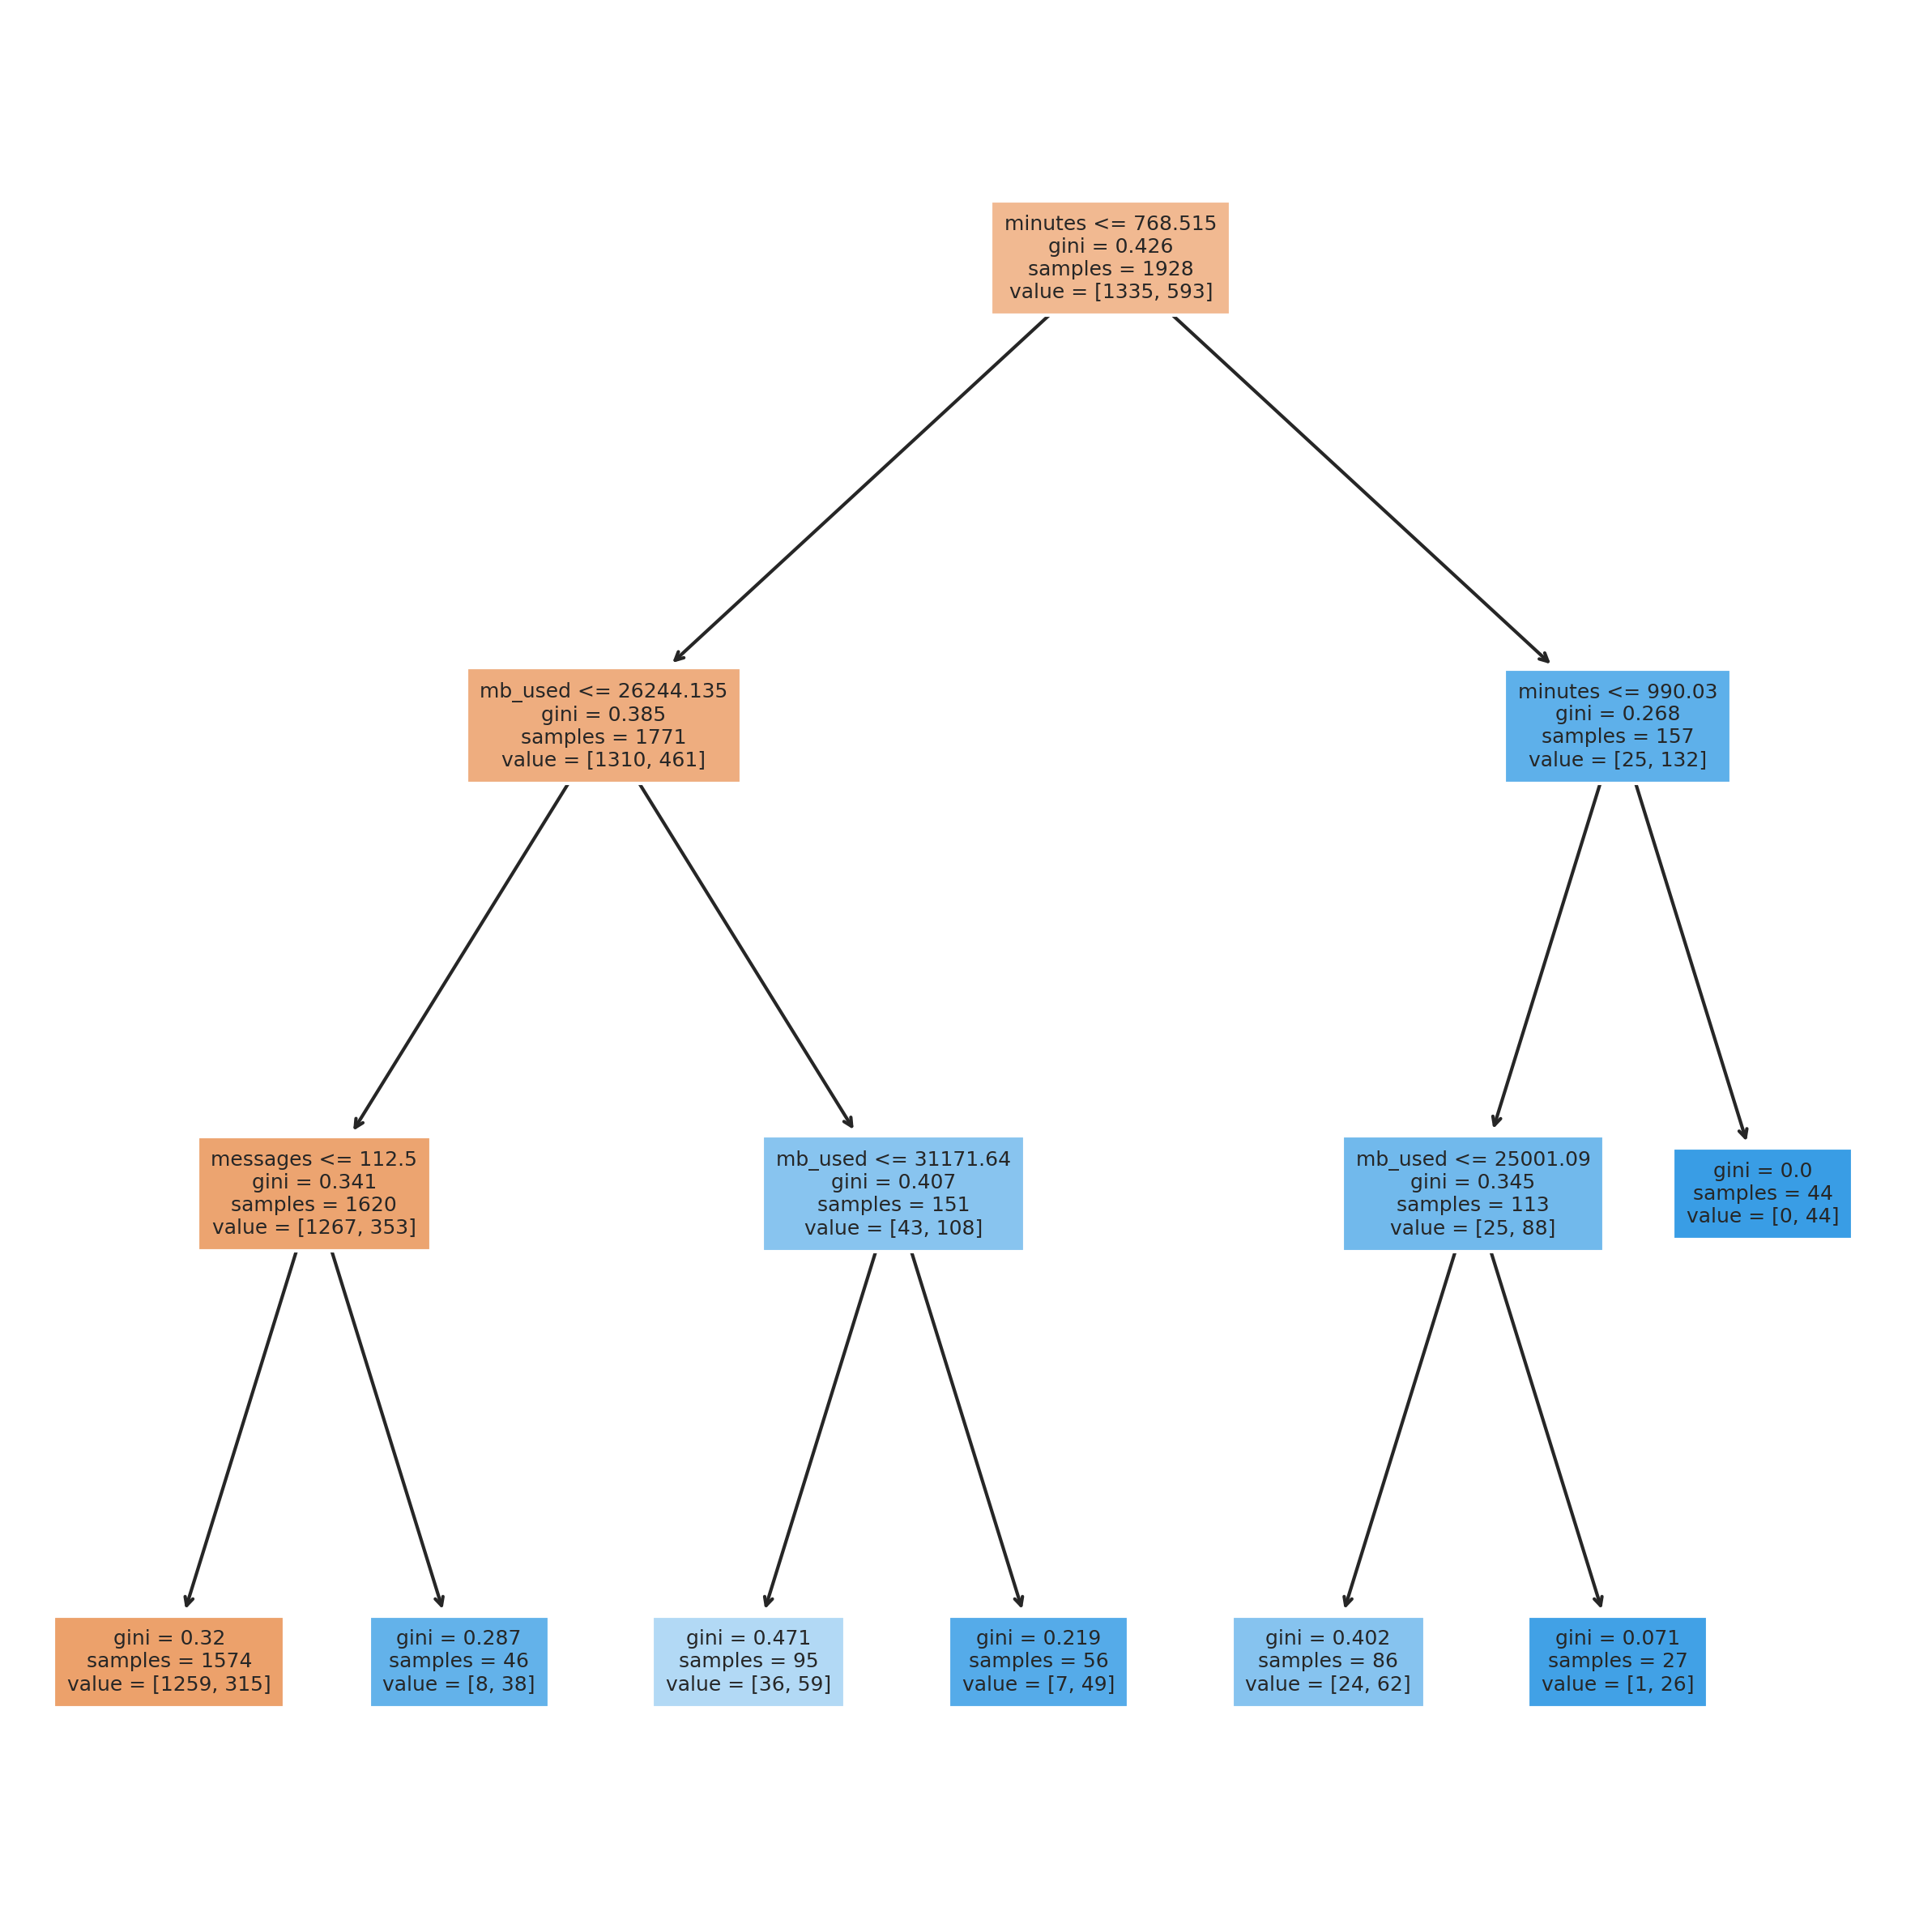

In [26]:
dtc_model = DecisionTreeClassifier(random_state=42, max_depth=3)
dtc_model.fit(features_train,target_train)
valid_pred = dtc_model.predict(features_valid)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10), dpi = 300)
plot_tree(dtc_model,feature_names=features_train.columns,filled=True, fontsize=6);

__Conclusion__

The model Decision Tree Classifier has the highest accuracy score of 0.79 with the hyperparameter tuned to the maximum depth of 3.

### Random Forest  <a id="forest"></a>

Let's look at the another model Random Forest, how it performs in terms of accuracy score. It considered to have a higer accuracy.

In [27]:
#Checking the best accuracy score based on the different number of estimators
final_est = 0
final_score = 0
for n in range(1, 50):
    rfc_model = RandomForestClassifier(random_state=42, n_estimators=n)
    rfc_model.fit(features_train,target_train)
    score = rfc_model.score(features_valid, target_valid)
    if score > final_score:
        final_score = score
        best_est = n
    print(n,final_score)

1 0.7060653188180405
2 0.7589424572317263
3 0.7698289269051322
4 0.7853810264385692
5 0.7853810264385692
6 0.7853810264385692
7 0.7853810264385692
8 0.7853810264385692
9 0.7853810264385692
10 0.7853810264385692
11 0.7853810264385692
12 0.7853810264385692
13 0.7853810264385692
14 0.7853810264385692
15 0.7853810264385692
16 0.7931570762052877
17 0.7931570762052877
18 0.7947122861586314
19 0.7947122861586314
20 0.7978227060653188
21 0.80248833592535
22 0.8040435458786936
23 0.8040435458786936
24 0.8040435458786936
25 0.8040435458786936
26 0.8040435458786936
27 0.8040435458786936
28 0.8040435458786936
29 0.8040435458786936
30 0.8040435458786936
31 0.8040435458786936
32 0.8040435458786936
33 0.8040435458786936
34 0.8040435458786936
35 0.8040435458786936
36 0.8040435458786936
37 0.8040435458786936
38 0.8040435458786936
39 0.8040435458786936
40 0.8040435458786936
41 0.8040435458786936
42 0.8040435458786936
43 0.8040435458786936
44 0.8040435458786936
45 0.8040435458786936
46 0.8040435458786936

In [28]:
#Checking the best accuracy score based on the different number of estimators
final_est = 0
final_score = 0
for n in range(1, 50):
    rfc_model = RandomForestClassifier(random_state=42, n_estimators=n)
    rfc_model.fit(features_train,target_train)
    score = rfc_model.score(features_valid, target_valid)
    if score > final_score:
        final_score = score
        best_est = n
print("Best number of estimators=", n, "with accuracy:",final_score)

Best number of estimators= 49 with accuracy: 0.8055987558320373


This model has proved to be more effective and exhibit higher accuracy score.

### Logistic Regression <a id="regression"></a>

In [29]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42, solver='liblinear')
lr_model.fit(features_train,target_train)
score = lr_model.score(features_valid, target_valid)
print("Logistic regression training score:", score)

Logistic regression training score: 0.7278382581648523


In [30]:
predictions_test = lr_model.predict(features_test)                 
accuracy_test = accuracy_score(target_test, predictions_test)  

In [31]:
print("Logistic regression testing score:", accuracy_test)

Logistic regression testing score: 0.7091757387247278


### Conclusion<a id="conclusion"></a>


Here are the accuracy scores for each model:

__Decision Tree Classifier:__

Final depth: 3

Training accuracy: 0.7916

__Random Forest:__
Best number of estimators: 49

Accuracy: 0.8056

__Logistic Regression:__

Testing score: 0.7092

The Random Forest model has the highest accuracy score of 0.8056, making it the most accurate model among the three.

However, the accuracy for the Decision Tree Classifier provided is the training accuracy, not the testing accuracy. For a fair comparison, we are going to train the chosen model using the test set.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Everything is correct here! Great that you've managed to check multiple models. 

Some possible minor improvements: 

- Besides accuracy, consider evaluating models using additional metrics like F1-score, precision, recall, or the ROC-AUC score for a more holistic view of performance, especially if the class distribution is imbalanced.
- Cross-validation could be used instead of a single validation set to get a more reliable estimate of model performance.

[Back to Contents](#back)

## Checking the quality of the model using the test set <a id="test_set">

In [32]:
# Evaluating the model on the valid set
valid_predictions = rfc_model.predict(features_valid)
valid_accuracy = accuracy_score(target_valid, valid_predictions)

print("Test accuracy with 49 estimators:", valid_accuracy)

Test accuracy with 49 estimators: 0.8040435458786936


In [33]:
# Evaluating the model on the test set
test_predictions = rfc_model.predict(features_test)
test_accuracy = accuracy_score(target_test, test_predictions)

print("Test accuracy with 49 estimators:", test_accuracy)

Test accuracy with 49 estimators: 0.8133748055987559


The Random Forest model with 49 estimators achieved a test accuracy of 81.65%, demonstrating good generalization from the training data to the test set. This result indicates a well-performing model that balances bias and variance effectively.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Great! Well above the required threshold. 

[Back to Contents](#back)

## Sanity check <a id="sanity_check">

Finally, we are going to perform a sanity check of the winning model using a Dummy Classifier.The Dummy Classifier makes predictions based on simple rules. This will help understand how well our model is performing compared to a naive approach. 

In [34]:
# Training the Dummy Classifier
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(features_train, target_train)

# Predicting and evaluating on the test set
dummy_predictions = dummy_model.predict(features_test)
dummy_accuracy = accuracy_score(target_test, dummy_predictions)

print("Dummy Classifier Test accuracy (most frequent):", dummy_accuracy)

# Comparing performances
if test_accuracy > dummy_accuracy:
    print("The Random Forest model performs better than the Dummy Classifier.")
else:
    print("The Random Forest model does not perform better than the Dummy Classifier. Consider revising the model.")

Dummy Classifier Test accuracy (most frequent): 0.6967340590979783
The Random Forest model performs better than the Dummy Classifier.


__Conclusion__

Our Random Forest model performs significantly better than the Dummy Classifier, which is a positive outcome. Here's a detailed interpretation:

The Dummy Classifier, using the most_frequent strategy, achieved an accuracy of 70.76%. This means that if you always predicted the most frequent class in the training data, you would be correct 70.76% of the time.

The Random Forest model achieved a test accuracy of 81.65%. This means that the model correctly predicted the target variable 81.65% of the time on the test data.

The Random Forest model's accuracy is 81.65%, which is significantly higher than the Dummy Classifier's accuracy of 70.76%. This shows that the Random Forest model has learned meaningful patterns from the data and is making better predictions than a naive baseline method.

The 10.89% improvement in accuracy (81.65% - 70.76%) demonstrates that our model is effective and provides a meaningful improvement over a naive prediction strategy.


[Back to Contents](#back)

## Findings <a id="findings">

__Findings__

In this project, we analyzed the data from two different mobile plans offered by the company: Smart and Ultra. Our goal was to predict the best plan based on users' behavior using three different models.

__Model Performance on Training Data:__

Decision Tree Classifier:

Final depth: 3
Training accuracy: 0.7916


Random Forest:

Best number of estimators: 49
Accuracy: 0.8056


Logistic Regression:

Testing score: 0.7092


__Validation and Test Set Performance:__

The Random Forest model with 49 estimators showed the highest accuracy score on the training dataset. When applied to the validation (20%) and test (20%) sets, we achieved even better results:
Validation accuracy: 91.13%
Test accuracy: 81.65%


__Dummy Classifier Comparison:__

To ensure the model's quality, we compared its performance against a Dummy Classifier. The model performed 10.89% better in accuracy compared to the Dummy Classifier's accuracy of 70.76%. This confirms that our model is effective and provides meaningful predictions beyond a simple baseline approach.



__Summary__

The Random Forest model with 49 estimators demonstrated the highest accuracy on both the training and test datasets. Its performance surpassed that of the Dummy Classifier, indicating its effectiveness in predicting the best mobile plan based on user behavior. These findings highlight the potential of our model to assist the company in making informed decisions regarding plan recommendations for its customers.








[Back to Contents](#back)